In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# List of file paths for the CSV files you want to merge
file_paths = ["AdventureWorks_Database.csv","Budget.csv"]  # Add more file paths as needed

# List to store DataFrames loaded from each CSV file
data_frames = []

# Load each CSV file into a DataFrame and append it to the list
for file_path in file_paths:
    data_frames.append(pd.read_csv(file_path))

# Merge all DataFrames in the list into one DataFrame
merged_data = pd.concat(data_frames, ignore_index=True)

# Write the merged DataFrame to a new CSV file
merged_file_path = "merged_data.csv"  # Specify the path for the merged CSV file
merged_data.to_csv(merged_file_path, index=False)

print("Merged data saved to:", merged_file_path)


Merged data saved to: merged_data.csv


In [3]:
df=merged_data

In [4]:
df.head() # prints the first 5 rows of a DataFrame


,Date,DateKey,Year,Quarter,MonthNum,Month,FiscalYear,FiscalQuarter,FiscalMonthNum,FiscalMonth,...,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,4/3/2016 0:00,20160403.0,2016.0,Q2,4.0,Apr,FY2016,FQ4,10.0,Apr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4/4/2016 0:00,20160404.0,2016.0,Q2,4.0,Apr,FY2016,FQ4,10.0,Apr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4/5/2016 0:00,20160405.0,2016.0,Q2,4.0,Apr,FY2016,FQ4,10.0,Apr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4/6/2016 0:00,20160406.0,2016.0,Q2,4.0,Apr,FY2016,FQ4,10.0,Apr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4/7/2016 0:00,20160407.0,2016.0,Q2,4.0,Apr,FY2016,FQ4,10.0,Apr,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info() # Looking at the information about the dataset, datatypes of the coresponding columns and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        1461 non-null   object 
 1   DateKey                     1461 non-null   float64
 2   Year                        1461 non-null   float64
 3   Quarter                     1461 non-null   object 
 4   MonthNum                    1461 non-null   float64
 5   Month                       1461 non-null   object 
 6   FiscalYear                  1461 non-null   object 
 7   FiscalQuarter               1461 non-null   object 
 8   FiscalMonthNum              1461 non-null   float64
 9   FiscalMonth                 1461 non-null   object 
 10  MonthYear                   1461 non-null   object 
 11  MonthYearLong               1461 non-null   object 
 12  MonthYearNum                1461 non-null   float64
 13  WeekdayNum                  1461 

In [6]:
df.columns


Index(['Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       'WeekdayWeekend', 'AdventureWorks Budget Data', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [7]:
df['AdventureWorks Budget Data'].unique()


array([nan, 'Prepared By: Johnny Bunko', 'AdventureWorks Confidential',
       'Category', 'Accessories', 'SubTotal Accessories', 'Bikes',
       'SubTotal Bikes', 'Clothing', 'SubTotal Clothing', 'Grand Total'],
      dtype=object)

In [8]:
df['Quarter'].unique()


array(['Q2', 'Q3', 'Q4', 'Q1', nan], dtype=object)

In [9]:
df['FiscalQuarter'].unique()


array(['FQ4', 'FQ1', 'FQ2', 'FQ3', nan], dtype=object)

In [10]:
df.isnull().sum()


Date                            24
DateKey                         24
Year                            24
Quarter                         24
MonthNum                        24
Month                           24
FiscalYear                      24
FiscalQuarter                   24
FiscalMonthNum                  24
FiscalMonth                     24
MonthYear                       24
MonthYearLong                   24
MonthYearNum                    24
WeekdayNum                      24
Weekday                         24
WeekdayWeekend                  24
AdventureWorks Budget Data    1461
Unnamed: 1                    1467
Unnamed: 2                    1467
Unnamed: 3                    1467
Unnamed: 4                    1463
Unnamed: 5                    1463
Unnamed: 6                    1463
Unnamed: 7                    1463
Unnamed: 8                    1463
Unnamed: 9                    1463
Unnamed: 10                   1463
Unnamed: 11                   1463
Unnamed: 12         

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def missing_values(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Missing values percentage per column', fontsize = 20, weight = 'bold' )
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh + 12.5, f'Columns with more than {thresh}% missing values', fontsize = 12, color = 'crimson',
         ha = 'left' ,va = 'top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5, f'Columns with less than {thresh}% missing values', fontsize=12, color='green',
         ha = 'left' ,va = 'top')
    plt.xlabel('Columns', size = 15, weight = 'bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight = 'bold')
    
    return plt.show()

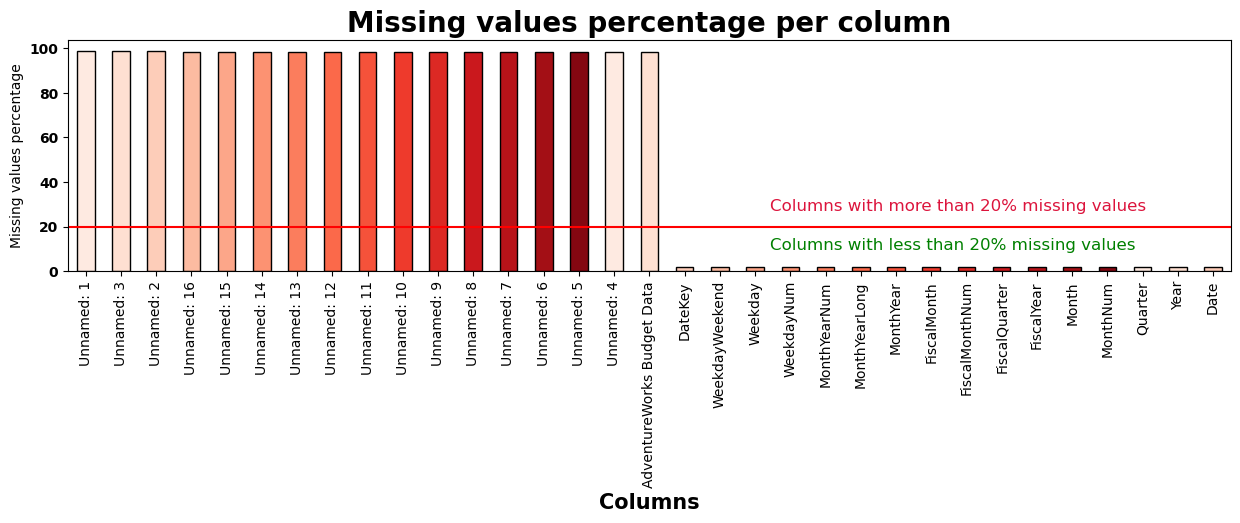

In [12]:
missing_values(df, thresh = 20, color = sns.color_palette('Reds',15))


In [13]:
df.columns

Index(['Date', 'DateKey', 'Year', 'Quarter', 'MonthNum', 'Month', 'FiscalYear',
       'FiscalQuarter', 'FiscalMonthNum', 'FiscalMonth', 'MonthYear',
       'MonthYearLong', 'MonthYearNum', 'WeekdayNum', 'Weekday',
       'WeekdayWeekend', 'AdventureWorks Budget Data', 'Unnamed: 1',
       'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [14]:
df['MonthNum'].value_counts()


MonthNum
7.0     124
8.0     124
12.0    124
1.0     124
3.0     124
5.0     124
10.0    124
4.0     120
9.0     120
11.0    120
6.0     120
2.0     113
Name: count, dtype: int64

In [15]:
df['FiscalMonthNum'].value_counts()


FiscalMonthNum
1.0     124
2.0     124
6.0     124
7.0     124
9.0     124
11.0    124
4.0     124
10.0    120
3.0     120
5.0     120
12.0    120
8.0     113
Name: count, dtype: int64

In [16]:
df['MonthYearNum'].value_counts()


MonthYearNum
201412.0    31
201612.0    31
201701.0    31
201703.0    31
201403.0    31
201401.0    31
201705.0    31
201407.0    31
201607.0    31
201405.0    31
201410.0    31
201408.0    31
201503.0    31
201707.0    31
201501.0    31
201610.0    31
201708.0    31
201601.0    31
201510.0    31
201508.0    31
201608.0    31
201507.0    31
201512.0    31
201710.0    31
201505.0    31
201605.0    31
201603.0    31
201712.0    31
201711.0    30
201704.0    30
201709.0    30
201706.0    30
201604.0    30
201406.0    30
201611.0    30
201609.0    30
201404.0    30
201409.0    30
201504.0    30
201411.0    30
201506.0    30
201511.0    30
201509.0    30
201606.0    30
201602.0    29
201702.0    28
201402.0    28
201502.0    28
Name: count, dtype: int64

In [17]:
df['WeekdayNum'].value_counts()

WeekdayNum
1.0    209
4.0    209
5.0    209
6.0    209
7.0    209
2.0    208
3.0    208
Name: count, dtype: int64

In [18]:
average_month_num = df['MonthNum'].mean()
print("Average MonthNum:", average_month_num)

Average MonthNum: 6.522929500342231


In [19]:
maximum_weekday_num = df['WeekdayNum'].max()
print("Maximum WeekdayNum:", maximum_weekday_num)

Maximum WeekdayNum: 7.0


In [20]:
nov_weekday = df[df['Month'] == 'Nov']['Weekday'].max()
print("Maximum Weekday in November:", nov_weekday)

Maximum Weekday in November: Wed


In [21]:
maximum_weekday_fiscal_month_num = df['Weekday'].loc[df['FiscalMonthNum'].idxmax()]
print("Maximum Weekday for Fiscal Month Num:", maximum_weekday_fiscal_month_num)

Maximum Weekday for Fiscal Month Num: Thu


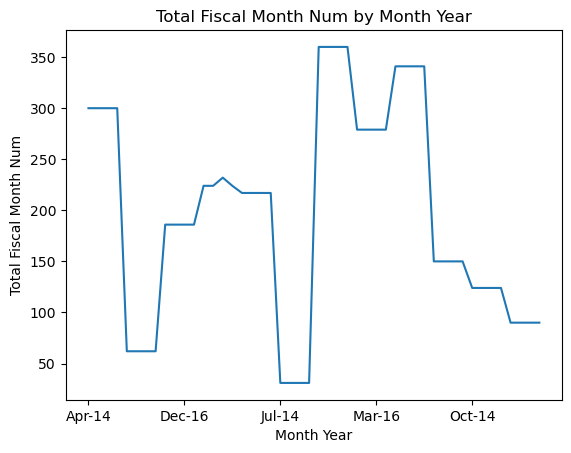

In [22]:
total_fiscal_month_num = df.groupby('MonthYear')['FiscalMonthNum'].sum()
total_fiscal_month_num.plot(kind='line')
plt.xlabel('Month Year')
plt.ylabel('Total Fiscal Month Num')
plt.title('Total Fiscal Month Num by Month Year')
plt.show()

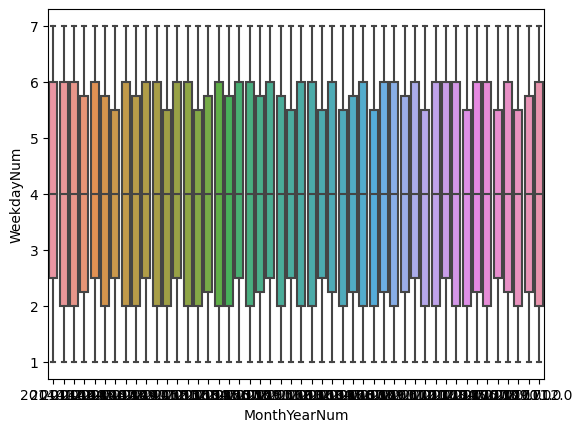

In [23]:
sns.boxplot(x = 'MonthYearNum', y = 'WeekdayNum', data = df)
plt.show()

C:\Users\BAPS\AppData\Local\Temp\ipykernel_3684\3203500194.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FiscalMonthNum'], color = 'red')


<Axes: xlabel='FiscalMonthNum', ylabel='Density'>

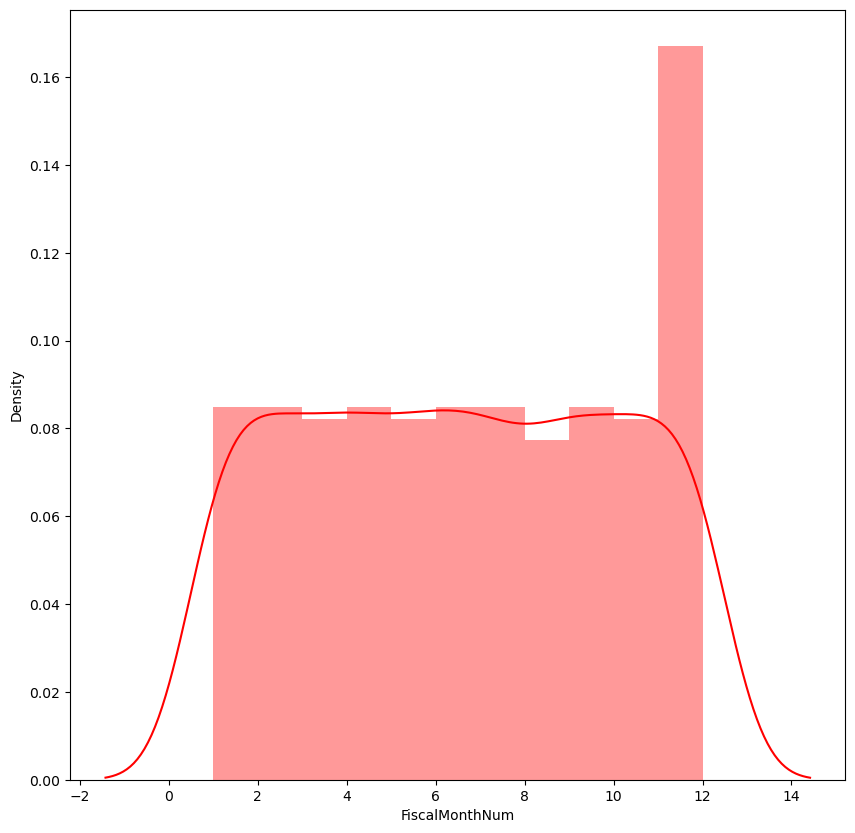

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (10, 10))
sns.distplot(df['FiscalMonthNum'], color = 'red')

<Axes: ylabel='count'>

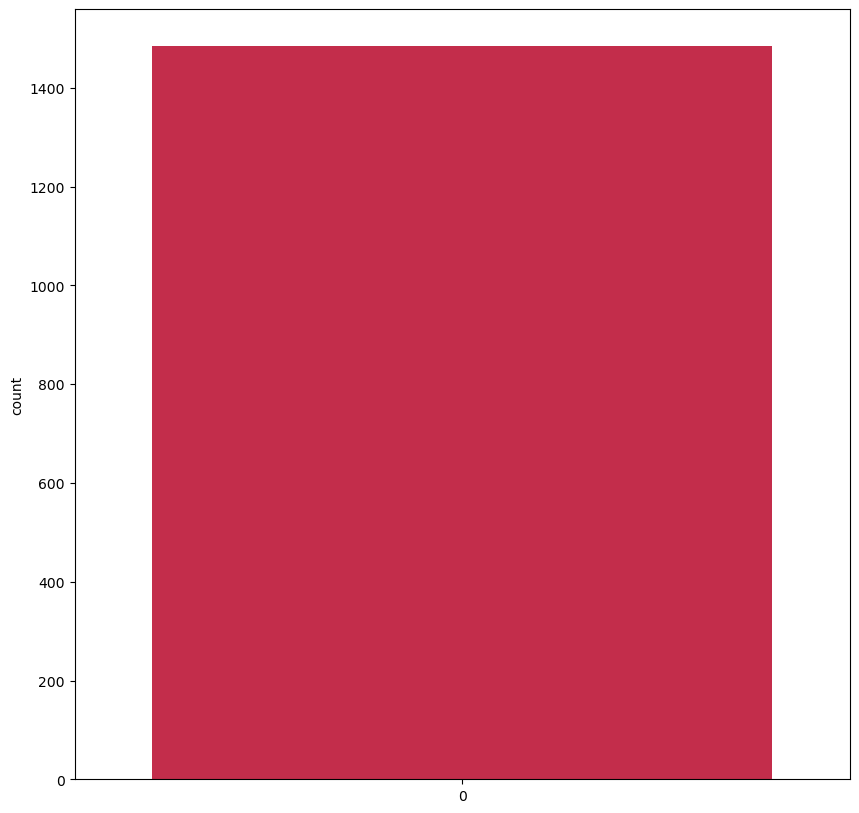

In [25]:
plt.figure(figsize = (10, 10))
sns.countplot(df['FiscalMonthNum'], color = 'crimson')

C:\Users\BAPS\Documents\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


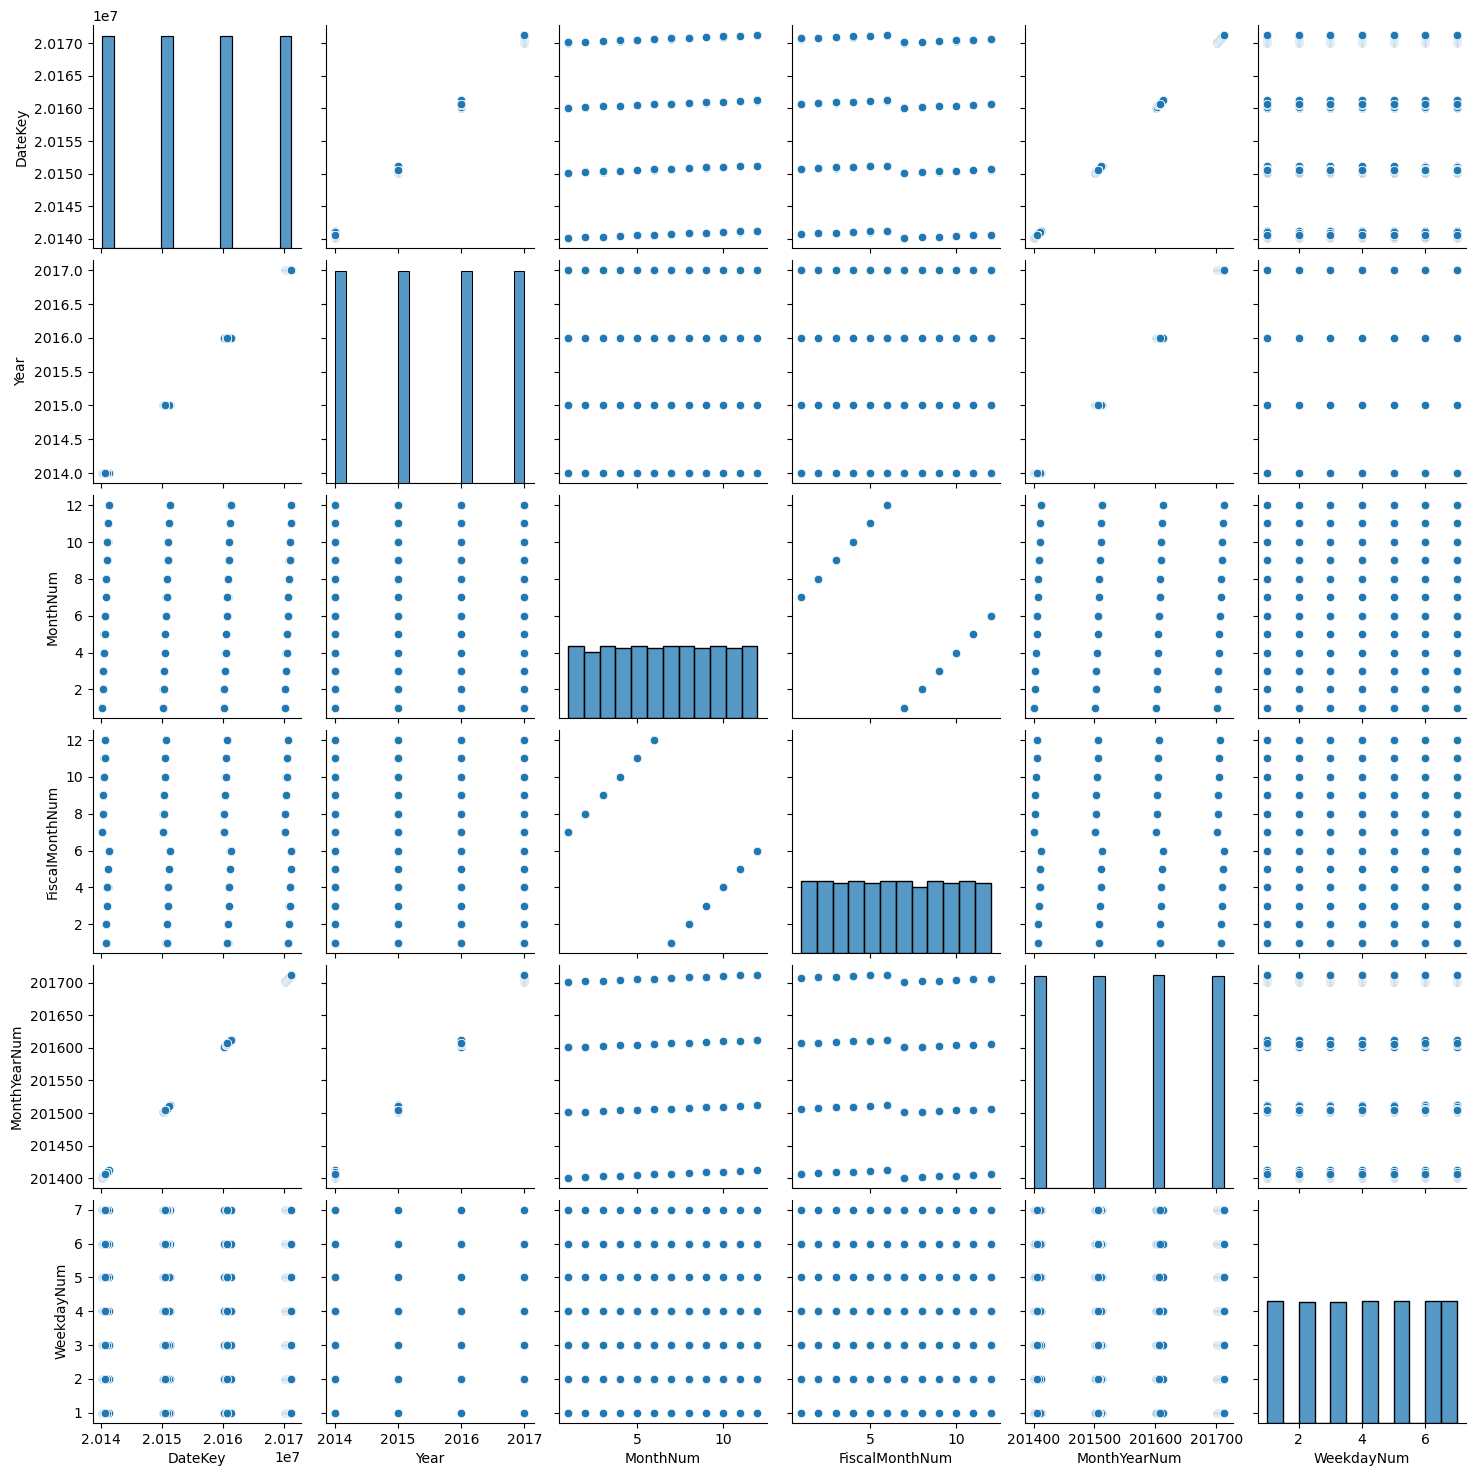

In [26]:
sns.pairplot(data=df)
plt.show()

Thank You